In [1]:
import numpy as np
import pandas as pd
%run ML.libaryPackage-1.0.0.ipynb

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
import warnings
from sklearn.metrics import roc_curve
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from imblearn.under_sampling import *
from sklearn.decomposition import PCA
from imblearn.combine import SMOTETomek
from lightgbm import LGBMClassifier
from sklearn.preprocessing import PolynomialFeatures

warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_csv('bigdata-analytics-specialist-human/human.csv', encoding='cp949')
df.head()

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,성별,자본 이득,자본 손실,주당 시간,모국
0,H20001,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,H20002,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,H20003,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,H20004,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,H20005,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [4]:
mdf = df.copy()

In [5]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   아이디     32561 non-null  object
 1   나이      32561 non-null  int64 
 2   노동 계급   30725 non-null  object
 3   fnlwgt  32561 non-null  int64 
 4   학력      32561 non-null  object
 5   교육 수    32561 non-null  int64 
 6   혼인 상태   32561 non-null  object
 7   직업      30718 non-null  object
 8   관계      32561 non-null  object
 9   인종      32561 non-null  object
 10  성별      32561 non-null  object
 11  자본 이득   32561 non-null  int64 
 12  자본 손실   32561 non-null  int64 
 13  주당 시간   32561 non-null  int64 
 14  모국      31978 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
mdf['혼인 상태'] = mdf['혼인 상태'].apply(lambda x: x.lstrip())

In [7]:
mdf['학력'] = mdf['학력'].apply(lambda x: x.lstrip())

In [8]:
mdf['혼인 상태'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: 혼인 상태, dtype: int64

In [9]:
mdf.loc[(mdf['혼인 상태'] == 'Divorced') |
            (mdf['혼인 상태'] == 'Never-married') |
            (mdf['혼인 상태'] == 'Separated') |
            (mdf['혼인 상태'] == 'Widowed'), '혼인 상태2'] = 'solo'
mdf.head()

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,성별,자본 이득,자본 손실,주당 시간,모국,혼인 상태2
0,H20001,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,solo
1,H20002,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,NaN
2,H20003,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,solo
3,H20004,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,NaN
4,H20005,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,NaN


In [10]:
mdf.loc[(mdf['혼인 상태'] == 'Married-civ-spouse') |
            (mdf['혼인 상태'] == 'Married-spouse-absen') |
        	(mdf['혼인 상태'] == 'Married-spouse-absent') |
            (mdf['혼인 상태'] == 'Married-AF-spouse') |
            (mdf['혼인 상태'] == 'Married-AF-spous'), '혼인 상태2'] = 'together'
mdf.head()

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,성별,자본 이득,자본 손실,주당 시간,모국,혼인 상태2
0,H20001,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,solo
1,H20002,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,together
2,H20003,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,solo
3,H20004,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,together
4,H20005,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,together


In [11]:
mdf[mdf['혼인 상태2'].isnull()]

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,성별,자본 이득,자본 손실,주당 시간,모국,혼인 상태2


In [12]:
mdf['노동 계급'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: 노동 계급, dtype: int64

In [13]:
mdf.loc[(mdf['노동 계급'] == ' Self-emp-inc') |
            (mdf['노동 계급'] == ' Private'), '노동 계급2'] = 'per'
mdf.head()

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,성별,자본 이득,자본 손실,주당 시간,모국,혼인 상태2,노동 계급2
0,H20001,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,solo,NaN
1,H20002,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,together,NaN
2,H20003,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,solo,per
3,H20004,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,together,per
4,H20005,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,together,per


In [14]:
mdf.loc[(mdf['노동 계급'] == ' Local-gov') |
            (mdf['노동 계급'] == ' State-gov') |
            (mdf['노동 계급'] == ' Federal-gov'), '노동 계급2'] = 'gov'
mdf.head()

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,성별,자본 이득,자본 손실,주당 시간,모국,혼인 상태2,노동 계급2
0,H20001,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,solo,gov
1,H20002,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,together,NaN
2,H20003,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,solo,per
3,H20004,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,together,per
4,H20005,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,together,per


In [15]:
mdf.loc[(mdf['노동 계급'] == ' Self-emp-not-inc') |
            (mdf['노동 계급'] == ' Without-pay') |
            (mdf['노동 계급'] == ' Never-worked'), '노동 계급2'] = 'noinc'
mdf.head()

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,성별,자본 이득,자본 손실,주당 시간,모국,혼인 상태2,노동 계급2
0,H20001,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,solo,gov
1,H20002,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,together,noinc
2,H20003,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,solo,per
3,H20004,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,together,per
4,H20005,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,together,per


In [16]:
mdf.isnull().sum()

아이디          0
나이           0
노동 계급     1836
fnlwgt       0
학력           0
교육 수         0
혼인 상태        0
직업        1843
관계           0
인종           0
성별           0
자본 이득        0
자본 손실        0
주당 시간        0
모국         583
혼인 상태2       0
노동 계급2    1836
dtype: int64

In [17]:
mdf.head()

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,성별,자본 이득,자본 손실,주당 시간,모국,혼인 상태2,노동 계급2
0,H20001,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,solo,gov
1,H20002,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,together,noinc
2,H20003,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,solo,per
3,H20004,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,together,per
4,H20005,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,together,per


In [18]:
mdf.loc[(mdf['직업'] == ' Craft-repair'), '직업2'] = 'gold'

In [19]:
mdf.isnull().sum()

아이디           0
나이            0
노동 계급      1836
fnlwgt        0
학력            0
교육 수          0
혼인 상태         0
직업         1843
관계            0
인종            0
성별            0
자본 이득         0
자본 손실         0
주당 시간         0
모국          583
혼인 상태2        0
노동 계급2     1836
직업2       28462
dtype: int64

In [20]:
mdf['직업'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: 직업, dtype: int64

In [21]:
mdf.loc[(mdf['직업'] == ' Prof-specialty') |
            (mdf['직업'] == ' Exec-managerial') |
            (mdf['직업'] == ' Adm-clerical') |
            (mdf['직업'] == ' Sales') |
            (mdf['직업'] == ' Other-service'), '직업2'] = 'white'

In [22]:
mdf.loc[(mdf['직업'] == ' Machine-op-inspct') |
            (mdf['직업'] == ' Transport-moving') |
            (mdf['직업'] == ' Handlers-cleaners') |
            (mdf['직업'] == ' Farming-fishing') |
            (mdf['직업'] == ' Protective-serv') |
            (mdf['직업'] == ' Priv-house-serv') |
            (mdf['직업'] == ' Armed-Forces'), '직업2'] = 'blue'

In [23]:
mdf.loc[(mdf['직업'] == ' Craft-repair'), '직업2'] = 'gold'

In [24]:
mdf.loc[(mdf['직업'] == ' Tech-support'), '직업2'] = 'gray'

In [25]:
mdf.head()

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,성별,자본 이득,자본 손실,주당 시간,모국,혼인 상태2,노동 계급2,직업2
0,H20001,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,solo,gov,white
1,H20002,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,together,noinc,white
2,H20003,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,solo,per,blue
3,H20004,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,together,per,blue
4,H20005,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,together,per,white


In [26]:
mdf.isnull().sum()

아이디          0
나이           0
노동 계급     1836
fnlwgt       0
학력           0
교육 수         0
혼인 상태        0
직업        1843
관계           0
인종           0
성별           0
자본 이득        0
자본 손실        0
주당 시간        0
모국         583
혼인 상태2       0
노동 계급2    1836
직업2       1843
dtype: int64

In [27]:
m = mdf[mdf['직업2'] == 'white']['자본 이득'].mean()
m

1469.6071560699752

In [28]:
mdf.isnull().sum()

아이디          0
나이           0
노동 계급     1836
fnlwgt       0
학력           0
교육 수         0
혼인 상태        0
직업        1843
관계           0
인종           0
성별           0
자본 이득        0
자본 손실        0
주당 시간        0
모국         583
혼인 상태2       0
노동 계급2    1836
직업2       1843
dtype: int64

In [29]:
obj = ['노동 계급', '학력', '혼인 상태', '직업', '관계', '인종', '성별', '모국','혼인 상태2','노동 계급2','직업2']
mdf[obj] = mdf[obj].apply(lambda x: x.astype('category').cat.codes)
mdf.head()

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,성별,자본 이득,자본 손실,주당 시간,모국,혼인 상태2,노동 계급2,직업2
0,H20001,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0,0,3
1,H20002,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,1,1,3
2,H20003,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0,2,0
3,H20004,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,1,2,0
4,H20005,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,1,2,3


<AxesSubplot:>

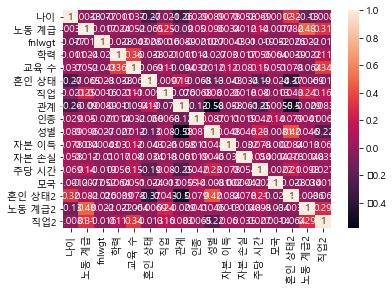

In [30]:
sns.heatmap(mdf.corr(), annot=True)

In [31]:
corr = mdf.corr()

In [32]:
abs(corr.성별).sort_values(ascending=False)

성별        1.000000
관계        0.582454
혼인 상태2    0.421465
주당 시간     0.229309
직업2       0.218103
혼인 상태     0.129314
노동 계급     0.095981
나이        0.088832
인종        0.087204
직업        0.080296
자본 이득     0.048480
노동 계급2    0.046082
자본 손실     0.045567
학력        0.027356
fnlwgt    0.026858
교육 수      0.012280
모국        0.008119
Name: 성별, dtype: float64

mdf.info(

In [33]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   아이디     32561 non-null  object
 1   나이      32561 non-null  int64 
 2   노동 계급   32561 non-null  int8  
 3   fnlwgt  32561 non-null  int64 
 4   학력      32561 non-null  int8  
 5   교육 수    32561 non-null  int64 
 6   혼인 상태   32561 non-null  int8  
 7   직업      32561 non-null  int8  
 8   관계      32561 non-null  int8  
 9   인종      32561 non-null  int8  
 10  성별      32561 non-null  int8  
 11  자본 이득   32561 non-null  int64 
 12  자본 손실   32561 non-null  int64 
 13  주당 시간   32561 non-null  int64 
 14  모국      32561 non-null  int8  
 15  혼인 상태2  32561 non-null  int8  
 16  노동 계급2  32561 non-null  int8  
 17  직업2     32561 non-null  int8  
dtypes: int64(6), int8(11), object(1)
memory usage: 2.1+ MB


In [34]:
mdf.head()

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,성별,자본 이득,자본 손실,주당 시간,모국,혼인 상태2,노동 계급2,직업2
0,H20001,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0,0,3
1,H20002,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,1,1,3
2,H20003,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0,2,0
3,H20004,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,1,2,0
4,H20005,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,1,2,3


In [112]:
from sklearn.model_selection import train_test_split  
X = mdf.drop(['아이디','성별'], axis=1) 
Y = mdf['성별']                    
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [113]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=6, random_state=0)

In [114]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=0)

In [116]:
display(tree.score(X_test, y_test))

0.8261884289399337

In [57]:
pa = ['아이디','혼인 상태2','노동 계급2', '직업2']
mdf[pa]

,아이디,혼인 상태2,노동 계급2,직업2
0,H20001,0,0,3
1,H20002,1,1,3
2,H20003,0,2,0
3,H20004,1,2,0
4,H20005,1,2,3
...,...,...,...,...
32556,H52557,1,2,2
32557,H52558,1,2,0
32558,H52559,0,2,3
32559,H52560,0,2,3


In [70]:
pa.head()

,아이디,혼인 상태2,노동 계급2,직업2
0,H20001,0,0,3
1,H20002,1,1,3
2,H20003,0,2,0
3,H20004,1,2,0
4,H20005,1,2,3


In [77]:
new=new.merge(pa,left_index=True, right_index=True)

In [78]:
new.head()

,아이디_x,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,자본 이득,자본 손실,주당 시간,모국,아이디_y,혼인 상태2,노동 계급2,직업2
0,H00001,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,0,0,40,United-States,H20001,0,0,3
1,H00002,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,0,0,50,United-States,H20002,1,1,3
2,H00003,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,0,0,40,United-States,H20003,0,2,0
3,H00004,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,7688,0,40,United-States,H20004,1,2,0
4,H00005,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,0,0,30,United-States,H20005,1,2,3


In [79]:
new = new.drop(['아이디_y'], axis='columns')

In [80]:
new.head()

,아이디_x,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,자본 이득,자본 손실,주당 시간,모국,혼인 상태2,노동 계급2,직업2
0,H00001,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,0,0,40,United-States,0,0,3
1,H00002,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,0,0,50,United-States,1,1,3
2,H00003,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,0,0,40,United-States,0,2,0
3,H00004,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,7688,0,40,United-States,1,2,0
4,H00005,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,0,0,30,United-States,1,2,3


In [95]:
mdf.head()

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,성별,자본 이득,자본 손실,주당 시간,모국,혼인 상태2,노동 계급2,직업2
0,H20001,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0,0,3
1,H20002,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,1,1,3
2,H20003,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0,2,0
3,H20004,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,1,2,0
4,H20005,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,1,2,3


In [ ]:
from sklearn.svm import SVC

In [111]:
dfX = mdf.drop(['아이디','성별'], axis = 1)  # exclude 'id' attribute & class variable
dfy = mdf['성별']      
X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.25, random_state=0)

In [97]:
svm = SVC(random_state=0)
svm.fit(X_train, y_train)

SVC(random_state=0)

In [98]:
display(svm.score(X_test, y_test))

0.6680997420464316

In [130]:
import numpy as np
from imblearn.under_sampling import RandomUnderSampler

In [131]:
from sklearn.feature_selection import SelectKBest

# 특징량을 5개 선택
selector = SelectKBest(k=5) 
selector.fit(X, Y)
mask = selector.get_support()

# 어느 변수를 선택하였는지 확인
print(mdf.drop('성별', axis=1).columns)
print(mask)

Index(['아이디', '나이', '노동 계급', 'fnlwgt', '학력', '교육 수', '혼인 상태', '직업', '관계', '인종',
       '자본 이득', '자본 손실', '주당 시간', '모국', '혼인 상태2', '노동 계급2', '직업2'],
      dtype='object')
[False False False False False  True False  True False False False  True
 False  True False  True]


In [133]:
X_sel5 = selector.transform(X)
print(X_sel5)

[[ 4  1 40  0  3]
 [ 2  0 13  1  3]
 [ 0  1 40  0  0]
 ...
 [ 6  4 40  0  3]
 [ 4  3 20  0  3]
 [ 2  5 40  1  3]]


Text(0.5, 0, '특성번호')

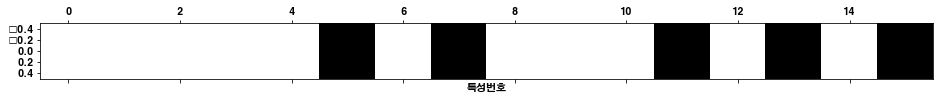

In [134]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:\Windows\Fonts\H2GTRE.TTF").get_name()
rc('font', family=font_name)

plt.matshow(mask.reshape(1,-1), cmap="gray_r")
plt.xlabel("특성번호")

In [135]:
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.metrics import accuracy_score

# K-Fold교차 검증
kf = KFold(n_splits=10, shuffle=True)
# 모델의 정밀도를 보존하기 위한 준비
scores = []
# 데이터를 셔플하고, 훈련데이터와 테스트 데이터를 분활
for train_id, test_id in kf.split(X_sel5):
    # 훈련 데이터를 사용한 모델을 작성
    x = X_sel5[train_id]
    y = Y[train_id]
    clf = tree.DecisionTreeClassifier()
    clf.fit(x,y)
    # 테스트 데이터에 모델을 적용
    pred_y = clf.predict(X_sel5[test_id])
    # 모델의 정밀도를 계산하고 보존
    score = accuracy_score(Y[test_id], pred_y)
    scores.append(score)

# 모델의 평균정밀도, 표준편차를 확인
scores = np.array(scores)
print(scores.mean(), scores.std())

0.8266639458840872 0.007559820970797872


In [136]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

# 재현률, 적합률의 확인
#print(confusion_matrix(Y[test_id], pred_y))
print(recall_score(Y[test_id], pred_y))
print(precision_score(Y[test_id], pred_y))

0.8299412030755314
0.9066205533596838


In [71]:
new = pd.read_csv('bigdata-analytics-specialist-human/human_new.csv', encoding='cp949')
new.head()

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,자본 이득,자본 손실,주당 시간,모국
0,H00001,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,0,0,40,United-States
1,H00002,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,0,0,50,United-States
2,H00003,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,0,0,40,United-States
3,H00004,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,7688,0,40,United-States
4,H00005,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,0,0,30,United-States


In [43]:
new.isnull().sum()

아이디         0
나이          0
노동 계급     963
fnlwgt      0
학력          0
교육 수        0
혼인 상태       0
직업        966
관계          0
인종          0
자본 이득       0
자본 손실       0
주당 시간       0
모국        274
dtype: int64

In [81]:
obj1 = ['노동 계급', '학력', '혼인 상태', '직업', '관계', '인종', '모국']
new[obj1] = new[obj1].apply(lambda x: x.astype('category').cat.codes)
new.head()

,아이디_x,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,자본 이득,자본 손실,주당 시간,모국,혼인 상태2,노동 계급2,직업2
0,H00001,25,3,226802,1,7,4,6,3,2,0,0,40,37,0,0,3
1,H00002,38,3,89814,11,9,2,4,0,4,0,0,50,37,1,1,3
2,H00003,28,1,336951,7,12,2,10,0,4,0,0,40,37,0,2,0
3,H00004,44,3,160323,15,10,2,6,0,2,7688,0,40,37,1,2,0
4,H00005,18,-1,103497,15,10,4,-1,3,4,0,0,30,37,1,2,3


In [82]:
new.isnull().sum()

아이디_x     0
나이        0
노동 계급     0
fnlwgt    0
학력        0
교육 수      0
혼인 상태     0
직업        0
관계        0
인종        0
자본 이득     0
자본 손실     0
주당 시간     0
모국        0
혼인 상태2    0
노동 계급2    0
직업2       0
dtype: int64

In [83]:
ndf = new.copy()
ndf.head()

,아이디_x,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,자본 이득,자본 손실,주당 시간,모국,혼인 상태2,노동 계급2,직업2
0,H00001,25,3,226802,1,7,4,6,3,2,0,0,40,37,0,0,3
1,H00002,38,3,89814,11,9,2,4,0,4,0,0,50,37,1,1,3
2,H00003,28,1,336951,7,12,2,10,0,4,0,0,40,37,0,2,0
3,H00004,44,3,160323,15,10,2,6,0,2,7688,0,40,37,1,2,0
4,H00005,18,-1,103497,15,10,4,-1,3,4,0,0,30,37,1,2,3


In [140]:
ndf['성별'] = tree.predict(ndf.loc[:,'나이':'직업2'])
ndf.head()

AttributeError: module 'sklearn.tree' has no attribute 'predict'

In [123]:
display(tree.score(X_test, y_test))

0.8261884289399337

In [125]:
str = ['아이디_x','성별']
ndf[str].head()

,아이디_x,성별
0,H00001,0
1,H00002,1
2,H00003,1
3,H00004,1
4,H00005,0


In [126]:
ndf_rename = ndf.rename(columns={'아이디_x':'ID', '성별':'SEX'})
ndf_rename.head()

,ID,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,자본 이득,자본 손실,주당 시간,모국,혼인 상태2,노동 계급2,직업2,SEX
0,H00001,25,3,226802,1,7,4,6,3,2,0,0,40,37,0,0,3,0
1,H00002,38,3,89814,11,9,2,4,0,4,0,0,50,37,1,1,3,1
2,H00003,28,1,336951,7,12,2,10,0,4,0,0,40,37,0,2,0,1
3,H00004,44,3,160323,15,10,2,6,0,2,7688,0,40,37,1,2,0,1
4,H00005,18,-1,103497,15,10,4,-1,3,4,0,0,30,37,1,2,3,0


In [127]:
str = ['ID','SEX']
ndf_rename[str].head()

,ID,SEX
0,H00001,0
1,H00002,1
2,H00003,1
3,H00004,1
4,H00005,0


In [128]:
ndf_rename[str].to_csv('submission_human.csv', encoding='cp949', index=False)

In [129]:
ndf_rename.shape

(16281, 18)